# Google Mobility Data

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress

###  The original CSV file was 120Mb, the file was run locally and only the data for the US was extracted, reducing the file size. Due to the Git Hub size limit, we proceed to work only with the filtered data for the US.
### The original 120Mb file is located at: https://drive.google.com/drive/folders/1s_eZIQvMcqwpDXB31nuZfWNnKteSeu1Z?usp=sharing
### This file should be copied in to the "data" folder, in order for the whole program to run from the beginning, otherwise procceed to the cell where the reduced US file is loaded.


In [3]:
# The path to the CSV file
file = "../Data/Global_Mobility_Report.csv"

# Read our mobility data into pandas
# It is a big original file with total of 1648861 rows × 14 columns
# i used low_memory=False, to open it, but there are better ways
google_mob_df = pd.read_csv(file,low_memory=False)
google_mob_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648856,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-29,NaN,NaN,NaN,NaN,-18.0,NaN
1648857,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-30,NaN,NaN,NaN,NaN,-12.0,NaN
1648858,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-07-31,NaN,NaN,NaN,NaN,-46.0,NaN
1648859,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-03,NaN,NaN,NaN,NaN,-4.0,NaN


In [4]:
# Selecting only the data for the US. This dropped the data to 456634 rows × 14 columns
google_mob_US_df = google_mob_df.loc[google_mob_df["country_region_code"] == "US"]
google_mob_US_df = google_mob_US_df.reset_index(drop = True)
google_mob_US_df
# # exprot the file so it can be loaded/uploaded 
google_mob_US_df.to_csv("../Data/Global_Mobility_Report_US.csv")
google_mob_US_df


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456629,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456630,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456631,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456632,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


#### US mobility report to load from here

In [6]:
 # Loads the new US mobility file, to avoid loading the Global file.
file_us = "../Data/Global_Mobility_Report_US.csv"
google_mob_US_df = pd.read_csv(file_us)
google_mob_US_df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [10]:
# Cleaning the data and droping columns that are not needed
clean_google_mob_US_df = google_mob_US_df.drop(["country_region_code",
                                                "Unnamed: 0",
                                                "country_region",
                                                "iso_3166_2_code",
                                                "census_fips_code",
                                                "metro_area"], axis = 1)
clean_google_mob_US_df.head(10)

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
5,NaN,NaN,2020-02-20,1.0,0.0,4.0,0.0,0.0,1.0
6,NaN,NaN,2020-02-21,2.0,-2.0,4.0,1.0,0.0,0.0
7,NaN,NaN,2020-02-22,7.0,3.0,23.0,5.0,4.0,-1.0
8,NaN,NaN,2020-02-23,7.0,3.0,23.0,5.0,2.0,-1.0
9,NaN,NaN,2020-02-24,2.0,1.0,9.0,1.0,3.0,0.0


In [11]:
# Renaming the columns
clean_google_mob_US_df.rename(columns = {"sub_region_1":"State","sub_region_2":"County",
                                         "retail_and_recreation_percent_change_from_baseline":"retail_and_recreation",
                                         "grocery_and_pharmacy_percent_change_from_baseline":"grocery_and_pharmacy",
                                         "parks_percent_change_from_baseline":"parks",
                                         "transit_stations_percent_change_from_baseline":"transit_stations",
                                         "workplaces_percent_change_from_baseline":"workplaces",
                                         "residential_percent_change_from_baseline":"residential"}, inplace = True)
clean_google_mob_US_df


,State,County,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
456629,Wyoming,Weston County,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456630,Wyoming,Weston County,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456631,Wyoming,Weston County,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456632,Wyoming,Weston County,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


In [12]:
# Checking the number of total states to better undestand the data...its 52
totalstates = len(clean_google_mob_US_df["State"].unique())
totalstates

52

In [13]:
# Drop the Na from the column State so we will end up with 51 States
clean_google_mob_US_df.dropna(subset=["State"], inplace = True)
clean_google_mob_US_df
# Checking the number of states
totalstates = len(clean_google_mob_US_df["State"].unique())
totalstates

51

In [15]:
# Reseting the index and saving the cleaned file to csv
clean_google_mob_US_df = clean_google_mob_US_df.reset_index(drop = True)
clean_google_mob_US_df.to_csv("../Data/clean_google_mob_US.csv")

In [16]:
clean_google_mob_US_df

,State,County,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Alabama,NaN,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
1,Alabama,NaN,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
2,Alabama,NaN,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
3,Alabama,NaN,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
4,Alabama,NaN,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
456457,Wyoming,Weston County,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456458,Wyoming,Weston County,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456459,Wyoming,Weston County,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456460,Wyoming,Weston County,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


In [17]:
# Grouping by date, so we can get all the data for all states into one date
data_by_date_df = pd.DataFrame(clean_google_mob_US_df.groupby("date").mean())
data_by_date_df.reset_index(inplace = True)
data_by_date_df

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,2020-02-15,6.438490,2.379197,16.658416,4.307071,0.440225,-0.550276
1,2020-02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800
2,2020-02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513
3,2020-02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469
4,2020-02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460
...,...,...,...,...,...,...,...
167,2020-07-31,-3.338162,5.251713,68.145488,-3.857418,-28.497639,7.663490
168,2020-08-01,-4.665718,7.484454,81.304189,1.590763,-9.850601,2.382151
169,2020-08-02,-1.311211,4.662641,76.178253,0.365062,-12.422342,2.327806
170,2020-08-03,1.516552,7.114116,56.354717,-6.108588,-27.709433,7.375178


In [18]:
start_date = "2020-02-15"
end_date = "2020-03-15"
mask = (data_by_date_df["date"] > start_date) & (data_by_date_df["date"] <= end_date)
first_month_df = data_by_date_df.loc[mask]
first_month_df.head()

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1,2020-02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800
2,2020-02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513
3,2020-02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469
4,2020-02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460
5,2020-02-20,0.178816,-0.153687,-1.258503,1.946819,-0.338327,1.141050


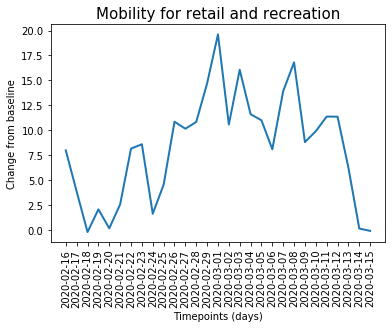

In [30]:
plt.plot(first_month_df["date"], 
         first_month_df["retail_and_recreation"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for retail and recreation", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.xticks(rotation=90)
# plt.hlines(0,0,10,alpha = 0.5) 
plt.show()

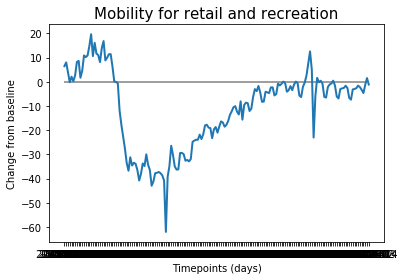

In [33]:
# The plot should be made fancyer, better colors, bigger, etc..
# Ploting a single plot as a example
plt.plot(data_by_date_df["date"], 
         data_by_date_df["retail_and_recreation"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for retail and recreation", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.hlines(0,0,170,alpha = 0.5) 
plt.show()

In [ ]:
# The data from apple is based on people destination searches, the data from google (this on) is based on the actual location
# One of the questions can be, what people searched on apple device and what actually happend, based on google data.

# Few limitations are.. i guess people dont search for places they know. 
# If im not going to work and i dont travel to new places, 
# since traveling was restricted
# i will go to places in my area and i will not use the search function... 
# also i will only search the first time and then i will know...



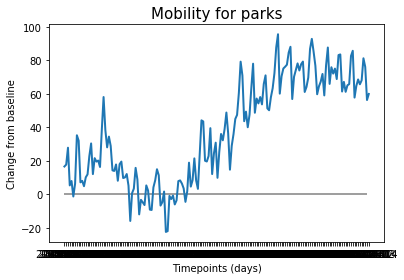

In [34]:
# Lets check the parks!
plt.plot(data_by_date_df["date"], 
         data_by_date_df["parks"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for parks", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.hlines(0,0,170,alpha = 0.5) 
plt.show()

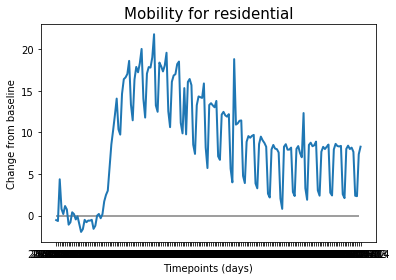

In [35]:
# The residential column can give answer to what extend people were following the stay at home guidelines
plt.plot(data_by_date_df["date"], 
         data_by_date_df["residential"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for residential", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.hlines(0,0,170,alpha = 0.5) 
plt.show()

In [43]:
start_date = "2020-05-01"
end_date = "2020-05-31"
mask = (data_by_date_df["date"] > start_date) & (data_by_date_df["date"] <= end_date)
april_month_df = data_by_date_df.loc[mask]
april_month_df

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
77,2020-05-02,-23.677076,2.276888,44.234177,-18.320408,-22.666971,8.533084
78,2020-05-03,-21.702619,-1.754669,43.565485,-22.642259,-25.599428,7.420085
79,2020-05-04,-18.048055,-1.151988,20.093604,-21.842654,-32.460957,13.287509
80,2020-05-05,-17.754123,2.711811,19.635930,-19.976258,-33.889961,14.341912
81,2020-05-06,-18.947054,1.088258,22.916399,-19.343896,-33.852647,14.246345
82,2020-05-07,-19.150576,2.742636,39.564924,-18.875468,-33.757337,14.159590
83,2020-05-08,-23.322034,0.135447,12.134831,-21.755898,-33.365907,15.905819
84,2020-05-09,-19.644102,12.981761,24.499305,-17.869436,-20.059763,8.197775
85,2020-05-10,-18.715944,7.787435,30.891654,-20.963077,-22.032243,5.716826
86,2020-05-11,-21.021374,-4.555035,9.898305,-20.731244,-30.839885,13.310395


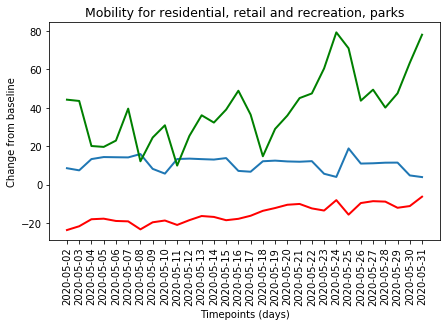

In [75]:
plt.plot(april_month_df["date"], 
         april_month_df["residential"],
         linewidth=2, label = "Residential")

plt.plot(april_month_df["date"], 
         april_month_df["parks"],
         linewidth=2, label = "Parks", color="Green")

plt.plot(april_month_df["date"], 
         april_month_df["retail_and_recreation"],
         linewidth=2, label = "retail_and_recreation", color="Red")

# driving = plt.plot(renamed_df[‘dates’],renamed_df[‘driving’],linewidth = 4, color=“Blue”, label = “Driving”)


# Adding title, x labels and y labels
plt.title("Mobility for residential, retail and recreation, parks", size = 12.5)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.xticks(rotation=90)
# plt.figure(figsize=(10,5))
plt.rcParams['figure.figsize'] = [7, 4]
# plt.hlines(0,0,10,alpha = 0.5) 
plt.savefig('fig7.png', dpi = 100)
plt.show()

In [45]:
# I wonder if the spikes, are for the actual weekends? We should further analyze that, 
# and if it confirms, it wll be an intresting observation. 
# Meaning when the stay at home, recommendation was issued, 
# people were respecting it and staying home, but were still like, Its weekend lets go out-or somewhere. 


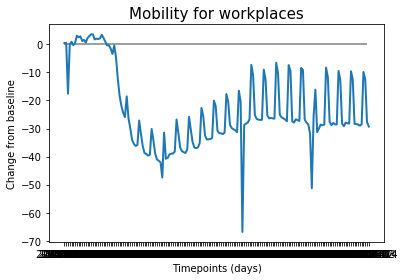

In [36]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["workplaces"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for workplaces", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.hlines(0,0,170,alpha = 0.5) 
plt.show()

In [85]:
# I did this part last, and afted i did it i figured out its a waste of time.
# The data is cumulative so it doesent show really anything
# i was hoping to plot a line from which i can see how the change in mobility affected the new covid cases
# For that purpoce, the data should be daily new cases, and not total cases


# NY times has a free data, for covid cases, per state the file is in the data folder
# The path to the CSV file
file3 = "../Data/us-states.csv"

# Read the ny times covid data into pandas
nytimes_covid = pd.read_csv(file3)
nytimes_covid

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
8919,2020-08-11,Virginia,51,101745,2344
8920,2020-08-11,Washington,53,66620,1786
8921,2020-08-11,West Virginia,54,7875,147
8922,2020-08-11,Wisconsin,55,66146,1017


In [87]:
# The google data starts at 2020-02-15, so before merging, we will drop all the data from the nytimes before 2020-02-15
# locating the index of 2020-02-15, it will appear multiple times, but we only need the last one.
x = nytimes_covid.loc[nytimes_covid["date"] == "2020-02-15"].index[-1]
# x =np.arange(x)
nytimes_covidx = nytimes_covid.drop(np.arange(x))
nytimes_covid_clean = nytimes_covidx.drop(["fips"], axis = 1)
nytimes_covid_clean.rename(columns={"state":"State","cases": "Covid cases", "deaths":"Covid deaths"}, inplace =True)
nytimes_covid_clean

,date,State,Covid cases,Covid deaths
121,2020-02-15,Wisconsin,1,0
122,2020-02-16,Arizona,1,0
123,2020-02-16,California,7,0
124,2020-02-16,Illinois,2,0
125,2020-02-16,Massachusetts,1,0
...,...,...,...,...
8919,2020-08-11,Virginia,101745,2344
8920,2020-08-11,Washington,66620,1786
8921,2020-08-11,West Virginia,7875,147
8922,2020-08-11,Wisconsin,66146,1017


In [90]:
# Creating a dataframe that shows the total number of covid cases
covid_data_by_date_df = pd.DataFrame(nytimes_covid_clean.groupby("date").sum())
covid_data_by_date_df.reset_index(inplace = True)
covid_data_by_date_df

,date,Covid cases,Covid deaths
0,2020-02-15,1,0
1,2020-02-16,15,0
2,2020-02-17,25,0
3,2020-02-18,25,0
4,2020-02-19,25,0
...,...,...,...
174,2020-08-07,4950708,160977
175,2020-08-08,5005904,161942
176,2020-08-09,5054258,162481
177,2020-08-10,5101384,163018


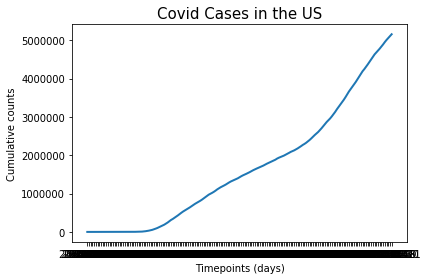

In [92]:
plt.plot(covid_data_by_date_df["date"], 
         covid_data_by_date_df["Covid cases"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Covid Cases in the US", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Cumulative counts")
plt.show()

In [89]:
# merging the two dataframes, just because. dont have an idea why, yet.
result = pd.merge(clean_google_mob_US_df, nytimes_covid_clean, how = "left", on=["date", "State"])
result

,Country,State,County,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases,Covid deaths
0,US,Alabama,NaN,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0,NaN,NaN
1,US,Alabama,NaN,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0,NaN,NaN
2,US,Alabama,NaN,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0,NaN,NaN
3,US,Alabama,NaN,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0,NaN,NaN
4,US,Alabama,NaN,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
456457,US,Wyoming,Weston County,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN,2628.0,26.0
456458,US,Wyoming,Weston County,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN,2686.0,26.0
456459,US,Wyoming,Weston County,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN,2726.0,26.0
456460,US,Wyoming,Weston County,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN,2848.0,27.0
